In [2]:
#Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("insurance.csv")


<AxesSubplot:>

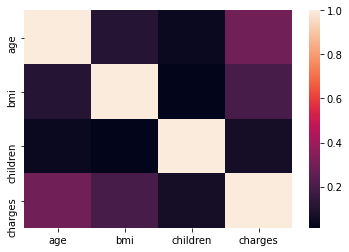

In [4]:
sns.heatmap(data.corr())

In [5]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [6]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
y_conc = y.copy()

print(x)
print(y)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [8]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

x[:, 1] = labelencoder.fit_transform(x[:, 1])
x[:, 4] = labelencoder.fit_transform(x[:, 4])
x[:, 5] = labelencoder.fit_transform(x[:, 5])
print(x[:, 1])
print(x[:, 4])
print(x[:, 5])
# print(x)
df1 = pd.DataFrame(x)
print(df1.to_string)
print(y)

[0 1 1 ... 0 0 0]
[1 0 0 ... 0 0 1]
[3 2 2 ... 2 3 1]
<bound method DataFrame.to_string of        0  1       2  3  4  5
0     19  0    27.9  0  1  3
1     18  1   33.77  1  0  2
2     28  1    33.0  3  0  2
3     33  1  22.705  0  0  1
4     32  1   28.88  0  0  1
...   .. ..     ... .. .. ..
1333  50  1   30.97  3  0  1
1334  18  0   31.92  0  0  0
1335  18  0   36.85  0  0  2
1336  21  0    25.8  0  0  3
1337  61  0   29.07  0  1  1

[1338 rows x 6 columns]>
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [21]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
reg=linear_model.LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=101)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
# print(X_test)

In [11]:
reg.fit(X_train,Y_train)

LinearRegression()

In [12]:
predictions = reg.predict(X_test)

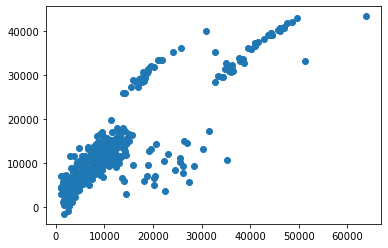

In [13]:
plt.scatter(Y_test,predictions)

In [28]:
from sklearn import metrics

In [52]:
print('MAE is',metrics.mean_absolute_error(Y_test,predictions))
print('MSE is',metrics.mean_squared_error(Y_test,predictions))
print('RMSE is',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE is 4010.3218839398587
MSE is 33693652.01080252
RMSE is 5804.6233306565655


In [51]:
#Linear Regression
from sklearn.linear_model import LinearRegression
#creating the Linear Regression model
lR = LinearRegression()
## feeding the training data to the model
lR.fit(X_train,Y_train)
y_pred_lR = lR.predict(X_test)
lR.score(X_train,Y_train)

0.7442085378400611

In [46]:
Y_prediction = lR.predict(X_test)

In [49]:
#importing r2_score module
from sklearn.metrics import r2_score
#predicting the accuracy score
score=r2_score(Y_test,Y_prediction)
print('r2 score is',score)

r2 score is 0.7601485628002146
